<a href="https://colab.research.google.com/github/MohammedQaraad/DeepleerningTF/blob/master/fashionmnistwithtensoflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm


print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, then just comment out this line and run this cell again
tf.enable_eager_execution()  

In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Label: 6


<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

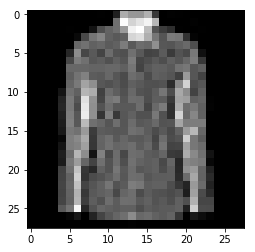

In [23]:
mnist_example, = test_dataset.take(1)
image, label = mnist_example[0], mnist_example[1]

plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
print("Label: %d" % label.numpy())

train_dataset

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [39]:
train_examle = metadata.splits['train'].num_examples
test_ex = metadata.splits['test'].num_examples
print('number of train example {}  test example {} '.format(train_examle , test_ex))

number of train example 60000  test example 10000 


In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

Label: 6


<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

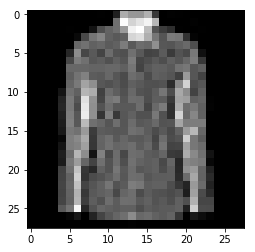

In [41]:
mnist_example, = test_dataset.take(1)
image, label = mnist_example[0], mnist_example[1]

plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
print("Label: %d" % label.numpy())

train_dataset

Shirt


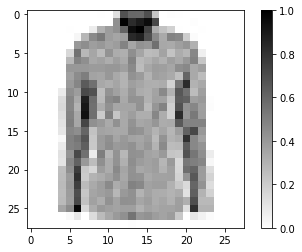

In [48]:
mnist_example, = test_dataset.take(1)
image, label = mnist_example[0], mnist_example[1]
#for image, label in test_dataset.take(1):
 # break
image = image.numpy().reshape((28,28))
label = label.numpy()
# Plot the image - voila a piece of fashion clothing
print(class_names[label])
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

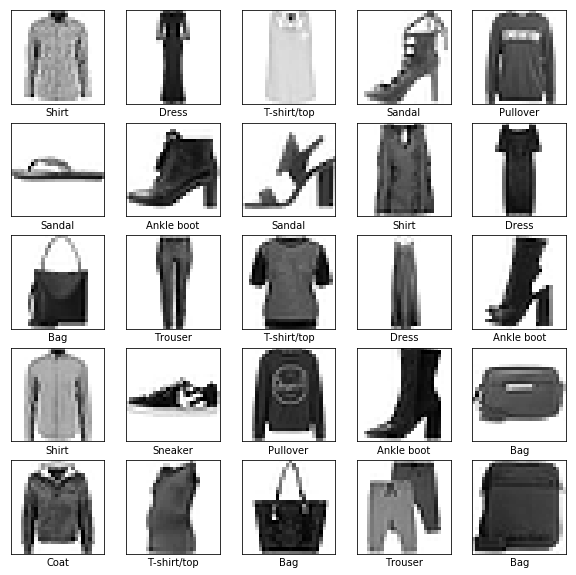

In [56]:
plt.figure(figsize=(10,10))
i = 0

for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [0]:
model = tf.keras.Sequential()
model.add(tf.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10 , activation= tf.nn.softmax))

In [0]:
model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(train_examle).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [66]:
model.fit(train_dataset, epochs=5 , steps_per_epoch=math.ceil(train_examle/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5011 - acc: 0.8236
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3701 - acc: 0.8652
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3396 - acc: 0.8759
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3113 - acc: 0.8870
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2948 - acc: 0.8920


In [69]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(test_ex/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.3528 - acc: 0.8740
Accuracy on test dataset: 0.874


In [108]:
for img , label in test_dataset.take(1):
  images= img.numpy()
  lab = label.numpy()
  predictions = model.predict(images)
  
len(predictions)
print(' shape {}'.format(predictions.shape))
print(' label shape {}'.format(lab.shape))


 shape (32, 10)
 label shape (32,)


In [94]:
predictions[0]

array([5.6850586e-05, 3.6352898e-08, 1.2590855e-02, 2.3814011e-05,
       5.0820634e-02, 2.3158719e-07, 9.3650544e-01, 6.3150596e-11,
       2.1256471e-06, 7.9153506e-10], dtype=float32)

In [95]:
np.argmax(predictions[0])

6

In [113]:
lab[0] == np.argmax(predictions[0])

True

In [111]:
pred = np.argmax(predictions , axis=1)
pred.shape


(32,)

In [0]:
result=[]
for i in range(BATCH_SIZE):
  result.append(lab[i] == np.argmax(predictions[i]))
  
result

In [110]:
lab.shape

(32,)

In [112]:
lab == pred

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True])

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

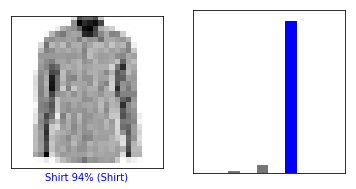

In [121]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, lab, images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  lab)

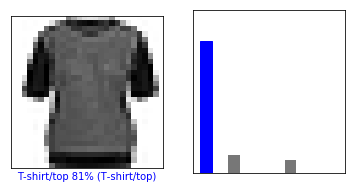

In [122]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, lab, images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  lab)

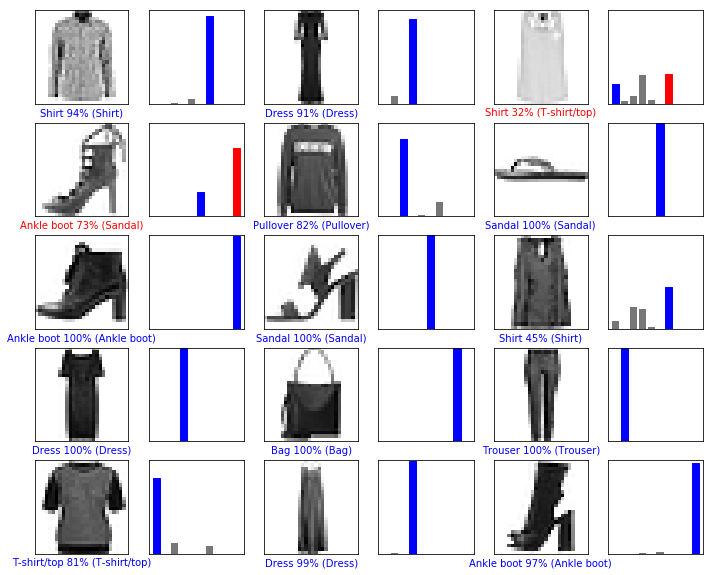

In [123]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, lab, images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, lab)


In [125]:
# Grab an image from the test dataset
img = images[0]

print(img.shape)


(28, 28, 1)


In [126]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [128]:
predictions_single = model.predict(img)

print(predictions_single)
print(np.argmax(predictions_single))

[[5.6850633e-05 3.6352890e-08 1.2590866e-02 2.3814076e-05 5.0820708e-02
  2.3158674e-07 9.3650532e-01 6.3150707e-11 2.1256508e-06 7.9153639e-10]]
6


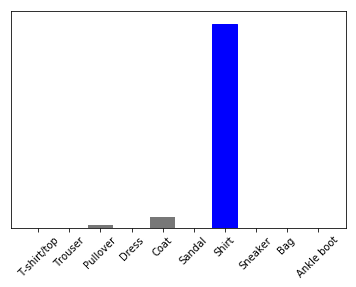

In [130]:
plot_value_array(0, predictions_single, lab)
_ = plt.xticks(range(10), class_names, rotation=45)

In [131]:
np.argmax(predictions_single[0])

6